In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('Mall_customer .csv')

In [11]:
df.shape

(250, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              250 non-null    int64 
 1   Gender                  250 non-null    object
 2   Age                     250 non-null    int64 
 3   Annual Income (k$)      250 non-null    int64 
 4   Spending Score (1-100)  250 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.9+ KB


In [13]:
X = df.iloc[:,3:].values

In [14]:
#bi variate analysis
#both columns are continous variables
#scatterplot

In [15]:
#correlation analysis

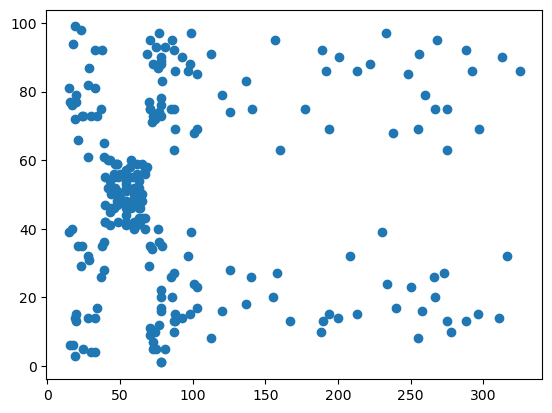

In [16]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [17]:
df.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_5760\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.058195,0.867164,0.012075
Age,-0.058195,1.000000,-0.060257,-0.359084
Annual Income (k$),0.867164,-0.060257,1.000000,0.011343
Spending Score (1-100),0.012075,-0.359084,0.011343,1.000000


In [18]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,250.000000,250.00000,250.000000,250.000000
mean,125.500000,38.49200,95.592000,50.244000
std,72.312977,13.17026,77.308758,27.289914
min,1.000000,18.00000,15.000000,1.000000
25%,63.250000,29.00000,47.000000,27.000000
50%,125.500000,36.00000,70.000000,50.000000
75%,187.750000,47.75000,101.000000,74.000000
max,250.000000,70.00000,325.000000,99.000000


In [19]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_new = st.fit_transform(X)

In [20]:
#if I applied StandardScaler, it has just scaled the values not changed the values

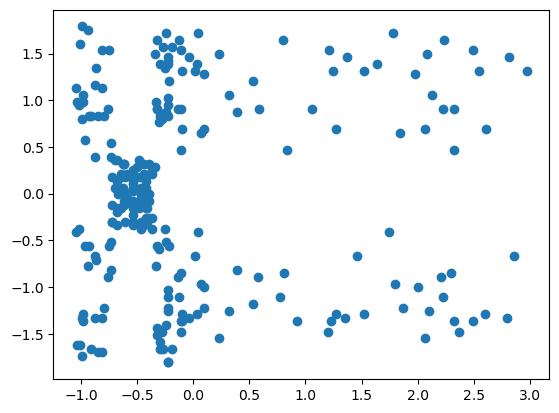

In [21]:
plt.scatter(X_new[:,0],X_new[:,1])
plt.show()

In [22]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=4)
kmean.fit(X_new)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [23]:
X_new[:10]

array([[-1.04456042, -0.41284687],
       [-1.04456042,  1.12927057],
       [-1.03159933, -1.62451058],
       [-1.03159933,  0.98240225],
       [-1.01863824, -0.37612979],
       [-1.01863824,  0.94568516],
       [-1.00567714, -1.62451058],
       [-1.00567714,  1.60659264],
       [-0.99271605, -1.73466182],
       [-0.99271605,  0.79881684]])

In [24]:
predict = kmean.predict(X_new)

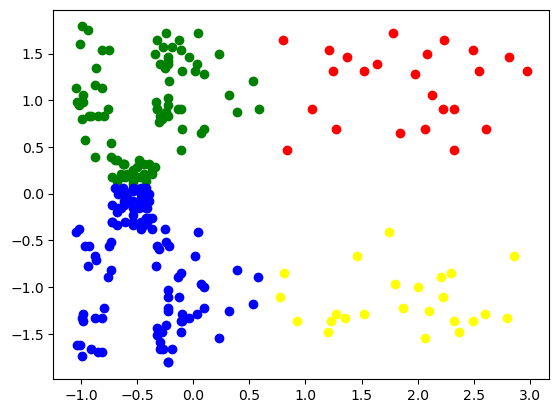

In [25]:
plt.scatter(X_new[predict==0][:,0],X_new[predict==0][:,1],c="green")
plt.scatter(X_new[predict==1][:,0],X_new[predict==1][:,1],c="yellow")
plt.scatter(X_new[predict==2][:,0],X_new[predict==2][:,1],c="blue")
plt.scatter(X_new[predict==3][:,0],X_new[predict==3][:,1],c="red")

In [26]:
#to find the best value of K
#elbow method

In [27]:
k_inertia = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit(X_new)
    k_inertia.append(km.inertia_)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

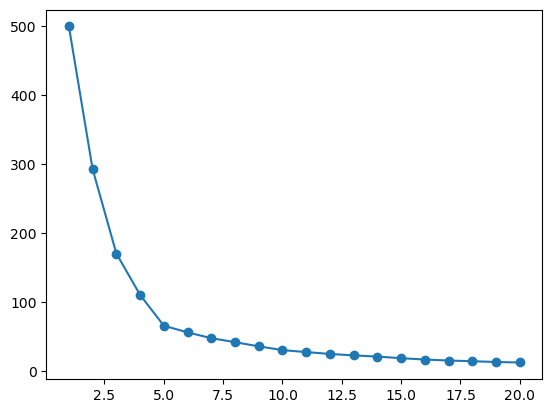

In [28]:
plt.scatter(range(1,21),k_inertia)
plt.plot(range(1,21),k_inertia)
plt.show()

In [29]:
#by using elbow method we got to know that the optimal value for k=5
#so we are building our model with 5 number of cluster

In [30]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=5)
kmean.fit(X_new)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [31]:
predict_new = kmean.predict(X_new)

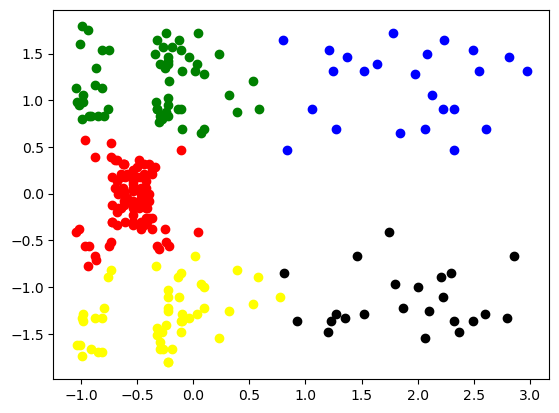

In [32]:
plt.scatter(X_new[predict_new==0][:,0],X_new[predict_new==0][:,1],c="green")
plt.scatter(X_new[predict_new==1][:,0],X_new[predict_new==1][:,1],c="yellow")
plt.scatter(X_new[predict_new==2][:,0],X_new[predict_new==2][:,1],c="blue")
plt.scatter(X_new[predict_new==3][:,0],X_new[predict_new==3][:,1],c="red")
plt.scatter(X_new[predict_new==4][:,0],X_new[predict_new==4][:,1],c="black")